## **Data Exploration**

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns


In [2]:
# Laod the data 
df = pl.read_excel("movies_ratings.xlsx")

In [3]:
# head of the data
df.head()

user,item,rating
i64,str,i64
1,"""Toy Story (1995)""",5
1,"""GoldenEye (1995)""",3
1,"""Four Rooms (1995)""",4
1,"""Get Shorty (1995)""",3
1,"""Copycat (1995)""",3


In [17]:
# shape of the data
df.shape

(99392, 3)

In [18]:
# number of distinct user
df['user'].n_unique()

943

In [22]:
# number of distinct movie  (string)
df['item'].n_unique()

1664

In [23]:
# min and max rating
df['rating'].min(), df['rating'].max()
print(f"the minimum rating is {df['rating'].min()} and the maximum rating is {df['rating'].max()}")

the minimum rating is 1 and the maximum rating is 5


In [33]:
# number of rating per user
df.group_by('user', maintain_order=True).agg(pl.count('rating').alias('number of rating')).sort('number of rating', descending=True).head(5)

user,number of rating
i64,u32
405,735
655,677
13,630
450,538
276,515


In [34]:
# top 5 movies with the highest rating
df.group_by('item', maintain_order=True).agg(pl.count('rating').alias('average rating')).sort('average rating', descending=True).head(5)

item,average rating
str,u32
"""Star Wars (1977)""",583
"""Contact (1997)""",509
"""Fargo (1996)""",508
"""Return of the Jedi (1983)""",507
"""Liar Liar (1997)""",485


In [35]:
# mean of rating per user 
df.group_by('user', maintain_order=True).agg(pl.mean('rating').alias('mean rating')).sort('mean rating', descending=True).head(5)

user,mean rating
i64,f64
849,4.869565
688,4.833333
507,4.724138
628,4.703704
928,4.677419


In [36]:
# top 20 movies with the highest rating
df.group_by('item', maintain_order=True).agg(pl.mean('rating').alias('average rating')).sort('average rating', descending=True).head(20)

item,average rating
str,f64
"""Great Day in Harlem, A (1994)""",5.0
"""They Made Me a Criminal (1939)""",5.0
"""Prefontaine (1997)""",5.0
"""Marlene Dietrich: Shadow and L…",5.0
"""Star Kid (1997)""",5.0
…,…
"""Close Shave, A (1995)""",4.491071
"""Schindler's List (1993)""",4.466443
"""Wrong Trousers, The (1993)""",4.466102


In [37]:
(df.group_by('item', maintain_order=True)
    .agg([
         pl.count('rating').alias('rating_count'),
         pl.mean('rating').alias('average_rating')
    ])
    .filter(pl.col('rating_count') >= 50)
    .sort('average_rating', descending=True)
    .head(20))

item,rating_count,average_rating
str,u32,f64
"""Close Shave, A (1995)""",112,4.491071
"""Schindler's List (1993)""",298,4.466443
"""Wrong Trousers, The (1993)""",118,4.466102
"""Casablanca (1942)""",243,4.45679
"""Wallace & Gromit: The Best of …",67,4.447761
…,…,…
"""North by Northwest (1959)""",179,4.284916
"""Godfather, The (1972)""",413,4.283293
"""Secrets & Lies (1996)""",162,4.265432


In [38]:
(df.group_by(['user', 'item'])
    .agg(pl.count('rating').alias('rating_count'))
    .filter(pl.col('rating_count') > 1)
    .sort('rating_count', descending=True))

user,item,rating_count
i64,str,u32


## **Data preparation**

In [39]:
# number of evaluation for 101 Dalmatians (1996) movie
df.filter(df['item'] == '101 Dalmatians (1996)').shape[0]

109

In [41]:
# mean rating for 101 Dalmatians (1996) movie
df.filter(df['item'] == '101 Dalmatians (1996)').select(pl.mean('rating'))

rating
f64
2.908257


In [44]:
# Set random seed for reproducibility
np.random.seed(42)

# Create test sample of 101 Dalmatians (1996) movie
Dalmatians_sample = df.filter(df['item'] == '101 Dalmatians (1996)')

# head of the test sample
Dalmatians_sample.head()

user,item,rating
i64,str,i64
1,"""101 Dalmatians (1996)""",2
5,"""101 Dalmatians (1996)""",2
13,"""101 Dalmatians (1996)""",2
15,"""101 Dalmatians (1996)""",3
38,"""101 Dalmatians (1996)""",5


In [45]:
# Without Dalmatians_sample
all_sample_wihout_Dalmatians = df.filter(df['item'] != '101 Dalmatians (1996)')

# head of the all_sample_wihout_Dalmatians
all_sample_wihout_Dalmatians.head()

user,item,rating
i64,str,i64
1,"""Toy Story (1995)""",5
1,"""GoldenEye (1995)""",3
1,"""Four Rooms (1995)""",4
1,"""Get Shorty (1995)""",3
1,"""Copycat (1995)""",3


In [46]:
# shape of all_sample_wihout_Dalmatians
all_sample_wihout_Dalmatians.shape

(99283, 3)

## **Prédiction aléatoire**

In [48]:
# Generate random predictions (1-5) for each rating in Dalmatians_sample
np.random.seed(42)  # for reproducibility
random_predictions = np.random.randint(1, 6, size=len(Dalmatians_sample))

# Calculate RMSE
actual_ratings = Dalmatians_sample['rating'].to_numpy()
rmse = np.sqrt(np.mean((actual_ratings - random_predictions) ** 2))

print(f"RMSE for random predictions: {rmse:.3f}")

RMSE for random predictions: 1.684


In [49]:
from sklearn.metrics import mean_squared_error

# Generate random predictions (1-5) for each rating in Dalmatians_sample
np.random.seed(42)  # for reproducibility
random_predictions = np.random.randint(1, 6, size=len(Dalmatians_sample))

# Calculate RMSE using sklearn metrics
rmse = np.sqrt(mean_squared_error(Dalmatians_sample['rating'], random_predictions))

print(f"RMSE for random predictions using sklearn metrics: {rmse:.3f}")

RMSE for random predictions using sklearn metrics: 1.684


In [50]:
# Initialize list to store RMSE values
rmse_values = []

# Repeat the process 1000 times
for _ in range(1000):
    # Generate random predictions (1-5) for each rating in Dalmatians_sample
    random_predictions = np.random.randint(1, 6, size=len(Dalmatians_sample))
    
    # Calculate RMSE for this iteration
    rmse = np.sqrt(mean_squared_error(Dalmatians_sample['rating'], random_predictions))
    rmse_values.append(rmse)

# Calculate and print the average RMSE
average_rmse = np.mean(rmse_values)
print(f"Average RMSE over 1000 random predictions: {average_rmse:.3f}")

# Optional: Calculate standard deviation
std_rmse = np.std(rmse_values)
print(f"Standard deviation of RMSE: {std_rmse:.3f}")

Average RMSE over 1000 random predictions: 1.775
Standard deviation of RMSE: 0.093


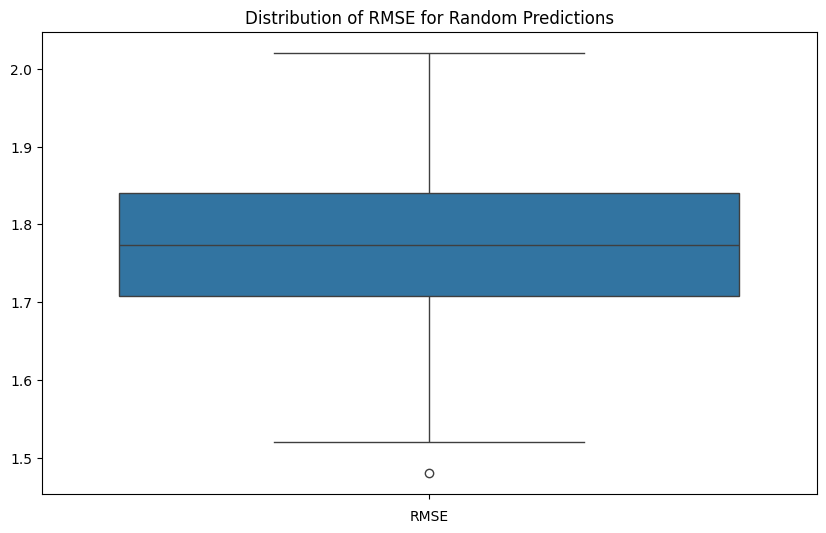

In [54]:
# show the boxplot of the average_rmse
plt.figure(figsize=(10, 6))
sns.boxplot(rmse_values)
plt.xlabel("RMSE")
plt.title("Distribution of RMSE for Random Predictions")
plt.show()

## **Prédiction systématique**

In [55]:
# Calculate the mean rating from all_sample_wihout_Dalmatians
mean_rating = all_sample_wihout_Dalmatians['rating'].mean()

# Create predictions using the mean rating
systematic_predictions = np.full(len(Dalmatians_sample), mean_rating)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(Dalmatians_sample['rating'], systematic_predictions))

print(f"Mean rating used for predictions: {mean_rating:.3f}")
print(f"RMSE for systematic predictions: {rmse:.3f}")

Mean rating used for predictions: 3.531
RMSE for systematic predictions: 1.239


In [59]:
# Calculate mean rating for '101 Dalmatians (1996)' from training set
dalmatians_mean = Dalmatians_sample['rating'].mean()

# Create predictions using the mean rating
predictions = np.full(len(Dalmatians_sample), dalmatians_mean)

# Calculate RMSE for Dalmatians predictions
rmse = np.sqrt(mean_squared_error(Dalmatians_sample['rating'], predictions))

print(f"Mean rating for '101 Dalmatians (1996)' in training set: {dalmatians_mean:.3f}")
print(f"RMSE for systematic prediction using movie mean: {rmse:.3f}")

Mean rating for '101 Dalmatians (1996)' in training set: 2.908
RMSE for systematic prediction using movie mean: 1.071


## **Algorithme Slope-One**